# Оптимизация с помощью `scipy.optimize`

**Одномерные функции**

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Методы-оптимизации" data-toc-modified-id="Методы-оптимизации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Методы оптимизации</a></span><ul class="toc-item"><li><span><a href="#Классификация" data-toc-modified-id="Классификация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Классификация</a></span></li><li><span><a href="#Библиотека-scipy.optimize" data-toc-modified-id="Библиотека-scipy.optimize-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Библиотека <code>scipy.optimize</code></a></span></li></ul></li><li><span><a href="#Целевая-функция" data-toc-modified-id="Целевая-функция-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Целевая функция</a></span><ul class="toc-item"><li><span><a href="#Квадратичная-функция" data-toc-modified-id="Квадратичная-функция-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Квадратичная функция</a></span></li><li><span><a href="#Парабола-$\times$-синус-(ParSin)" data-toc-modified-id="Парабола-$\times$-синус-(ParSin)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Парабола $\times$ синус (ParSin)</a></span></li></ul></li><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Постановка задачи</a></span><ul class="toc-item"><li><span><a href="#Данные-без-шума" data-toc-modified-id="Данные-без-шума-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Данные без шума</a></span></li><li><span><a href="#Данные-с-шумом" data-toc-modified-id="Данные-с-шумом-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Данные с шумом</a></span></li></ul></li><li><span><a href="#Задание" data-toc-modified-id="Задание-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Решение.-Данные-без-шума" data-toc-modified-id="Решение.-Данные-без-шума-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Решение. Данные без шума</a></span><ul class="toc-item"><li><span><a href="#Метод-сопряжённых-градиентов" data-toc-modified-id="Метод-сопряжённых-градиентов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Метод сопряжённых градиентов</a></span></li><li><span><a href="#Метод-Бройдена-—-Флетчера-—-Гольдфарба-—-Шанно-(BFGS)" data-toc-modified-id="Метод-Бройдена-—-Флетчера-—-Гольдфарба-—-Шанно-(BFGS)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Метод Бройдена — Флетчера — Гольдфарба — Шанно (BFGS)</a></span></li><li><span><a href="#Метод-Нелдера-—-Мида-(симплекс)" data-toc-modified-id="Метод-Нелдера-—-Мида-(симплекс)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Метод Нелдера — Мида (симплекс)</a></span></li></ul></li><li><span><a href="#Решение.-Данные-с-шумом" data-toc-modified-id="Решение.-Данные-с-шумом-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Решение. Данные с шумом</a></span><ul class="toc-item"><li><span><a href="#Метод-сопряжённых-градиентов" data-toc-modified-id="Метод-сопряжённых-градиентов-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Метод сопряжённых градиентов</a></span></li><li><span><a href="#Метод-Бройдена-—-Флетчера-—-Гольдфарба-—-Шанно-(BFGS)" data-toc-modified-id="Метод-Бройдена-—-Флетчера-—-Гольдфарба-—-Шанно-(BFGS)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Метод Бройдена — Флетчера — Гольдфарба — Шанно (BFGS)</a></span></li><li><span><a href="#Метод-Нелдера-—-Мида-(симплекс)" data-toc-modified-id="Метод-Нелдера-—-Мида-(симплекс)-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Метод Нелдера — Мида (симплекс)</a></span></li></ul></li></ul></div>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
from scipy.optimize import minimize

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 12
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')
from IPython.display import Image
im_width = 800

In [3]:
# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Методы оптимизации

### Классификация

**Классификация оптимизационных задач**

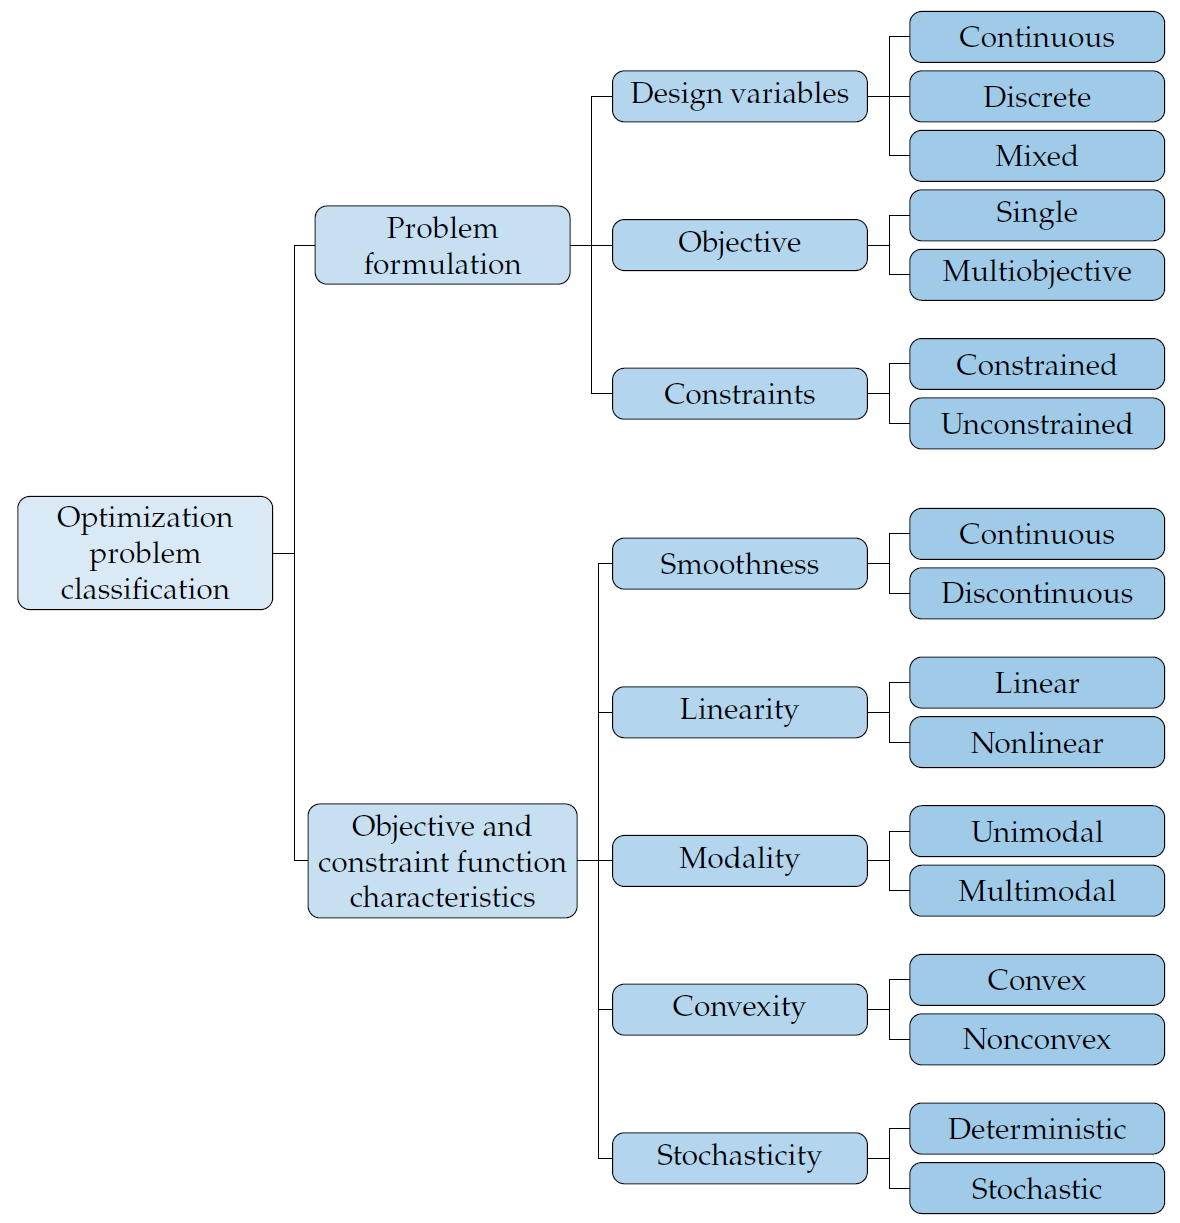

In [4]:
display(Image('./pix/OptProblemClass.png', width=im_width))

**Классификация оптимизационных алгоритмов**

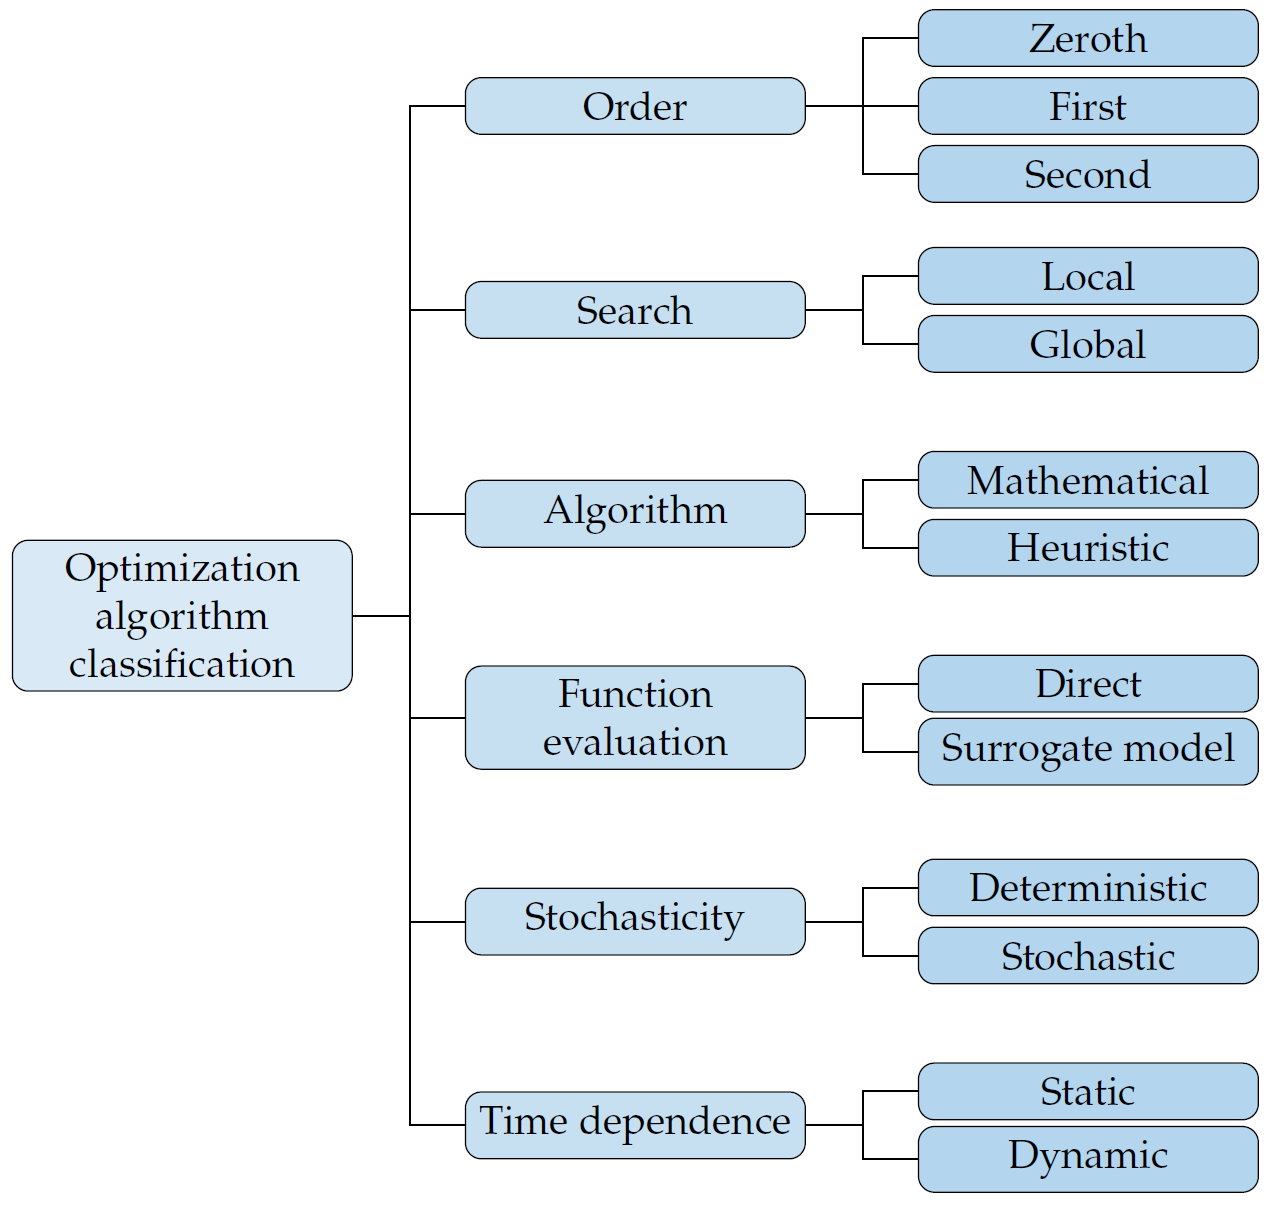

In [5]:
display(Image('./pix/OptAlgClass.png', width=0.8*im_width))

Источник: *Martins J.R.R.A. & Ning A.* Engineering Design Optimization. &mdash; 2021. &mdash;  637 с.

### Библиотека `scipy.optimize`

Для решения задач условной и безусловной оптимизации пакет `scipy.optimize` предлагает набор алгоритмов, включающий в том числе следующие:

- Метод сопряжённых градиентов ([CG](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D1%8B%D1%85_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2))
- Алгоритм Бройдена &mdash; Флетчера &mdash; Гольдфарба &mdash; Шанно ([BFGS](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D1%80%D0%BE%D0%B9%D0%B4%D0%B5%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BB%D0%B5%D1%82%D1%87%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%93%D0%BE%D0%BB%D1%8C%D0%B4%D1%84%D0%B0%D1%80%D0%B1%D0%B0_%E2%80%94_%D0%A8%D0%B0%D0%BD%D0%BD%D0%BE))
- Последовательное квадратичное программирования ([SLSQP](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5))
- Симплекс-метод [Нелдера &mdash; Мида](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D0%B5%D0%BB%D0%B4%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%9C%D0%B8%D0%B4%D0%B0)
- Алгоритм COBYLA ([Constrained Optimization By Linear Approximation](https://en.wikipedia.org/wiki/Michael_J._D._Powell))

Подробнее об оптимизации с помощью `scipy.optimize` можно прочитать [тут](https://docs.scipy.org/doc/scipy/tutorial/optimize.html).

---

## Целевая функция

Подключаем библиотеки, создаём вспомогательные функции.

In [6]:
from copy import deepcopy
def counted(f):
    def wrapped(*args, **kwargs):
        wrapped.calls += 1
        wrapped.Xk.append(deepcopy(*args))
#         print(wrapped.calls, *args)
        return f(*args, **kwargs)
    wrapped.calls = 0
    wrapped.Xk = []
    return wrapped

# auxiliary function to save intermediate points
def store(xk):
    Xk.append(xk)

### Квадратичная функция

Начнём с самого простого:

$$ f(x) = x^2 $$

In [7]:
@counted
def QF(x):
    '''Quadratic function'''
    return x*x
QF.__name__ = 'QF'

### Парабола $\times$ синус (ParSin)

$$ f(x) = (6x-2)^2 \cdot \sin\left(12x-4\right) $$

Глобальный минимум: $x = 0.757$, $f(x) = -6.021$\
Локальный минимум:  $x = 0.143$, $f(x) = -0.986$\
Точка перегиба:     $x = 0.333$, $f(x) = 0.0$

In [8]:
@counted
def ParSin(x):
    '''Parabola times sine'''
    return (6*x-2)**2 * np.sin(12*x-4)
ParSin.__name__ = 'ParSin'

In [9]:
def set_constants(obj_fun):
    '''Set bounds and optimum point'''
    
    if obj_fun == QF:
        X_LIM = [-2., 2.]
        F_LIM = [0, obj_fun(X_LIM[1])]
        X_OPT = 0.
    
    elif obj_fun == ParSin:
        X_LIM = [0., 1.]
        F_LIM = [0, obj_fun(X_LIM[1])]
        X_OPT = 0.757
    
    X_LIM = np.array(X_LIM)
    F_LIM = np.array(F_LIM)
    X_OPT = np.array(X_OPT)
    
    return X_LIM, F_LIM, X_OPT

---

## Постановка задачи

### Данные без шума

Выбор задачи и установка констант

In [10]:
obj_funs = [QF, ParSin] # choose a function

obj_fun = obj_funs[1]
X_LIM, F_LIM, X_OPT = set_constants(obj_fun)

print(f'obj_fun = {obj_fun.__name__}')
print(f'X_OPT = {X_OPT}, obj_fun(X_OPT) = {obj_fun(X_OPT):.3f}')

obj_fun = ParSin
X_OPT = 0.757, obj_fun(X_OPT) = -6.021


Отрисовка графиков выбранной целевой функции

In [11]:
def graph_fun(fun, trajectory=[], figname='', noisy=False):
    '''Plot function'''
    plt.figure(figsize=(8, 5))
    X_test = np.linspace(*X_LIM, 401)
    
    # function contours
    if noisy:
        plt.plot(X_test, fun(X_test), 'kx', alpha=.5, label='Objective function')
    else:
        plt.plot(X_test, fun(X_test), 'k-', label='Objective function')
    
    # points
    plt.plot(X_OPT, fun(X_OPT), '*', ms=20, c=cm(3), label='Minimum')
    if (len(trajectory) != 0):
        X = trajectory
        plt.plot(X[0],  fun(X[0]),   'o', c=cm(0), ms=8)
        plt.plot(X,     fun(X),     '-o', c=cm(0), ms=3.5)
        plt.plot(X[-1], fun(X[-1]),  '+', c=cm(0), mew=2., ms=15)
        
    plt.legend()
    plt.tight_layout()
    if (figname):
        plt.savefig(figname, dpi=200, bbox_inches='tight')

In [12]:
graph_fun(obj_fun)

<Figure size 800x500 with 1 Axes>

### Данные с шумом

Теперь добавим к целевой функции шум:
$$
  f_{noisy} = f(x) + \sigma_{n} \xi.
$$

Здесь $\xi$ &mdash; нормальная случайная величина, переменная $\sigma_{n}$ задаёт амплитуду шума.

In [13]:
def add_noise(fun, sigma_n):
    def ret_fun(x):
        xi = np.random.randn(*x.shape)
        return fun(x) + sigma_n * xi
    return ret_fun

In [14]:
sigma_n = 1e-1
obj_fun_noisy = add_noise(obj_fun, sigma_n)

In [15]:
graph_fun(obj_fun_noisy, noisy=True)

<Figure size 800x500 with 1 Axes>

---

## Задание

Необходимо провести сравнительное тестирование двух предложенных алгоритмов (можно больше) и оформить отчёт в виде файла `.ipynb`.

Отчёт должен содержать:

1. Теоретическая часть: краткое описание алгоритмов, как их можно классифицировать.
1. Сравнение эффективности работы алгоритмов. Эффективность работы оценивается по количеству вызовов целевой функции при заданной точности. Для сравнения необходимо использовать две целевые функции: парабола и ParSin. Приветствуется визуализация работы алгоритма (пример будет ниже).
1. Анализ результатов. Заключение.
1. (Опционально) Исследовать влияние амплитуды шума на точность работы алгоритмов и количество вызовов целевой функции.

**Замечания**:

1. Список параметров алгоритма можно получить так: `sp.optimize.show_options(solver='minimize', method='Nelder-Mead')`
2. Определённая выше функция `graph_fun()` может рисовать траекторию поиска и сохранять рисунок (см. параметры функции)

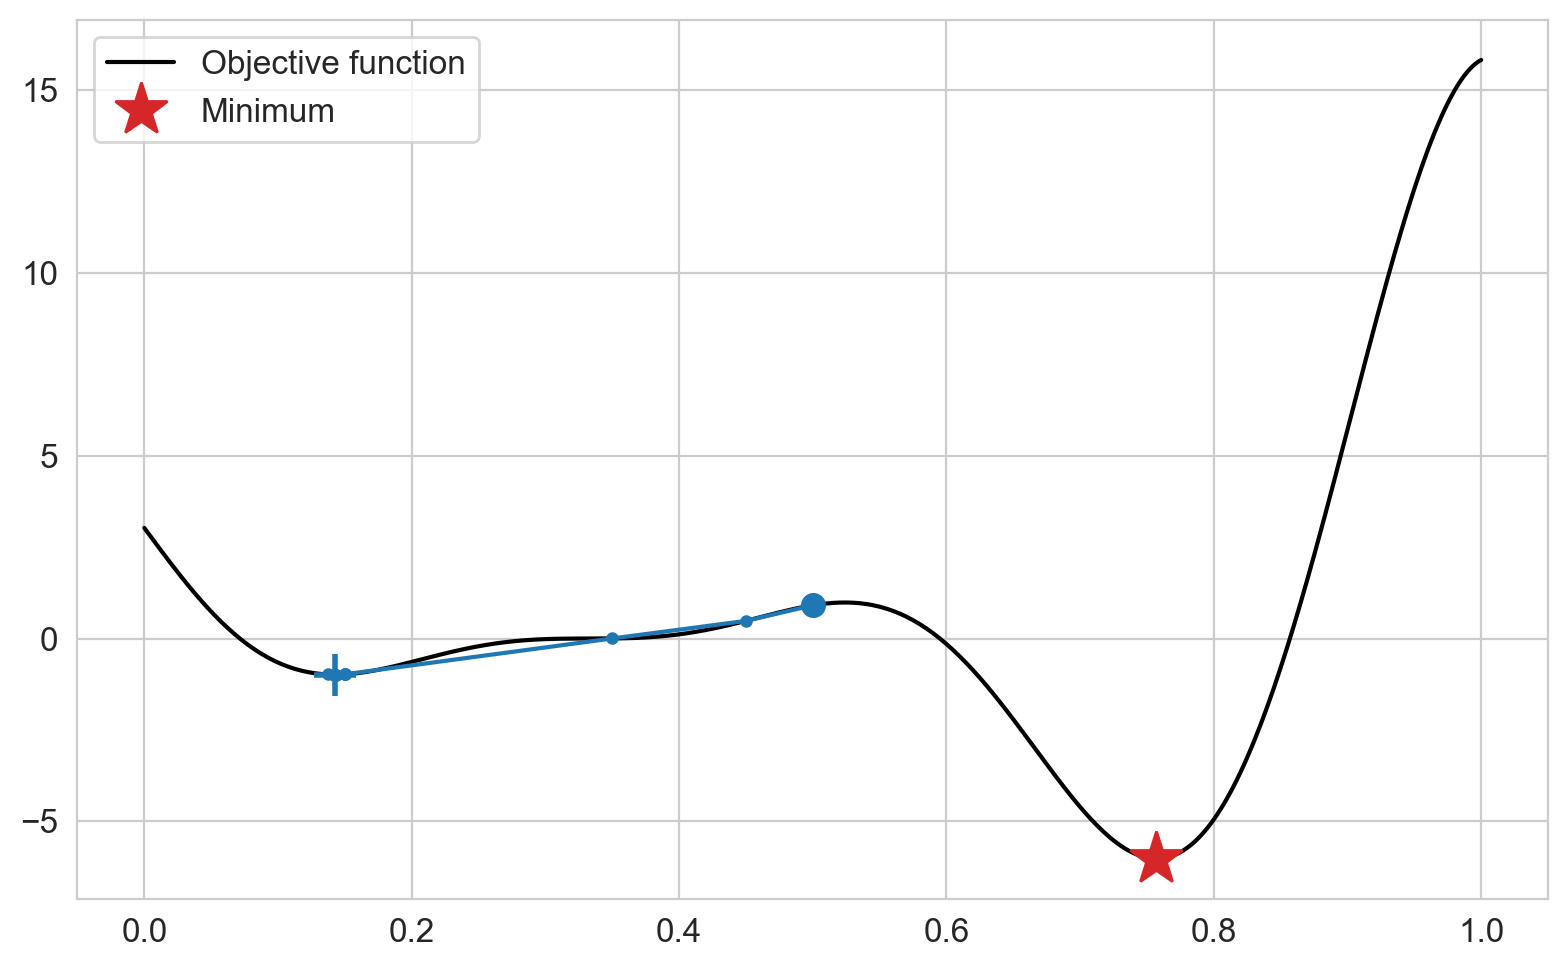

In [16]:
display(Image('./pix/1-2.Nelder-Mead.png', width=im_width))

---

## Решение. Данные без шума

Выбор начального приближения и настройка опций

In [17]:
np.random.seed(42)
# X0 = (X_LIM[1]-X_LIM[0])*np.random.rand(*X_OPT.shape) + X_LIM[0]
X0 = 0.5
TOL = 1e-3
opt_eps = 1e-3

print(f'X0 = {X0}, f_obj = {obj_fun(X0):.3f}')
print(f'TOL = {TOL}, opt_eps = {opt_eps}')

X0 = 0.5, f_obj = 0.909
TOL = 0.001, opt_eps = 0.001


### Метод сопряжённых градиентов

In [18]:
# sp.optimize.show_options(solver='minimize', method='CG')

In [19]:
# CG
x0 = X0
obj_fun.calls = 0
obj_fun.Xk = [x0]
res = minimize(obj_fun, x0, method='CG', tol=TOL,
               options={'disp':True, 'eps':opt_eps, 'return_all':True})
Xk  = np.array(res.allvecs)
Xk2 = np.array(obj_fun.Xk[1:])

print(f'\nobjective calls = {obj_fun.calls}')
print(f'x = {res.x}, f_obj = {obj_fun(res.x)}\n')

         Current function value: -0.986289
         Iterations: 2
         Function evaluations: 112
         Gradient evaluations: 50

objective calls = 112
x = [0.14209943], f_obj = [-0.98628877]



In [20]:
figname = '1-1.CG.png'
graph_fun(obj_fun, trajectory=Xk)

<Figure size 800x500 with 1 Axes>

### Метод Бройдена — Флетчера — Гольдфарба — Шанно (BFGS)

In [21]:
# sp.optimize.show_options(solver='minimize', method='BFGS')

In [22]:
# BFGS
x0 = X0
obj_fun.calls = 0
obj_fun.Xk = [x0]
res = minimize(obj_fun, x0, method='BFGS', tol=TOL,
               options={'disp':True, 'eps':opt_eps, 'return_all':True})
Xk  = np.array(res.allvecs)
Xk2 = np.array(obj_fun.Xk[1:])

print(f'\nobjective calls = {obj_fun.calls}')
print(f'x = {res.x}, f_obj = {obj_fun(res.x)}\n')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 20
         Gradient evaluations: 10

objective calls = 20
x = [0.33347243], f_obj = [1.1626432e-09]



In [23]:
figname = '1-2.BFGS.png'
graph_fun(obj_fun, trajectory=Xk)

<Figure size 800x500 with 1 Axes>

In [24]:
# sp.optimize.show_options(solver='minimize', method='L-BFGS-B')

In [25]:
# BFGS
x0 = X0
obj_fun.calls = 0
obj_fun.Xk = [x0]
res = minimize(obj_fun, x0, bounds=[X_LIM,], method='L-BFGS-B', tol=TOL,
               options={'disp':True, 'eps':opt_eps})
Xk2 = np.array(obj_fun.Xk[1:])

print(f'\nobjective calls = {obj_fun.calls}')
print(f'x = {res.x}, f_obj = {obj_fun(res.x)}\n')


objective calls = 16
x = [0.14240087], f_obj = [-0.98632]



In [26]:
figname = '1-2.BFGS.png'
graph_fun(obj_fun, trajectory=Xk)

<Figure size 800x500 with 1 Axes>

### Метод Нелдера — Мида (симплекс)

In [27]:
# sp.optimize.show_options(solver='minimize', method='Nelder-Mead')

In [28]:
# Nelder-Mead
x0 = X0
obj_fun.calls = 0
obj_fun.Xk = []
res = minimize(obj_fun, x0, bounds=[X_LIM,], method='Nelder-Mead', tol=TOL,
               options={'disp':True, 'return_all':True})
Xk  = np.array(res.allvecs)
Xk2 = np.array(obj_fun.Xk[1:])

print(f'objective calls = {obj_fun.calls}')
print(f'x = {res.x}, f_obj = {obj_fun(res.x)}\n')

Optimization terminated successfully.
         Current function value: -0.986304
         Iterations: 12
         Function evaluations: 24
objective calls = 24
x = [0.14296875], f_obj = [-0.9863035]



In [29]:
figname = '1-2.Nelder-Mead.png'
graph_fun(obj_fun, trajectory=Xk)

<Figure size 800x500 with 1 Axes>

---

## Решение. Данные с шумом

Выбор начального приближения и настройка опций

In [30]:
np.random.seed(42)
# X0  = (X_LIM[1]-X_LIM[0])*np.random.rand(*X_OPT.shape) + X_LIM[0]
X0  = 0.5
TOL = 1e-1
opt_eps = 1e-3

sigma_n = 2e-1
obj_fun_noisy = add_noise(obj_fun, sigma_n)

print(f'X0 = {X0}, f_obj = {obj_fun(X0):.3f}')
print(f'TOL = {TOL}, opt_eps = {opt_eps}')
print(f'sigma_n = {sigma_n}')

X0 = 0.5, f_obj = 0.909
TOL = 0.1, opt_eps = 0.001
sigma_n = 0.2


### Метод сопряжённых градиентов

In [31]:
# CG
x0 = X0
obj_fun.calls = 0
obj_fun.Xk = [x0]
res = minimize(obj_fun_noisy, x0, method='CG', tol=TOL,
               options={'disp':True, 'eps':opt_eps, 'return_all':True})
Xk  = np.array(res.allvecs)
Xk2 = np.array(obj_fun.Xk[1:])

print(f'\nobjective calls = {obj_fun.calls}')
print(f'x = {res.x}, f_obj = {obj_fun(res.x)}\n')

         Current function value: -5.385648
         Iterations: 1
         Function evaluations: 43
         Gradient evaluations: 17

objective calls = 43
x = [0.71772863], f_obj = [-5.29296414]



In [32]:
figname = '2-1.CG.png'
graph_fun(obj_fun_noisy, trajectory=Xk, noisy=True)

<Figure size 800x500 with 1 Axes>

### Метод Бройдена — Флетчера — Гольдфарба — Шанно (BFGS)

In [33]:
# BFGS
x0 = X0
obj_fun.calls = 0
obj_fun.Xk = [x0]
res = minimize(obj_fun_noisy, x0, method='BFGS', tol=TOL,
               options={'disp':True, 'eps':opt_eps, 'return_all':True})
Xk  = np.array(res.allvecs)
Xk2 = np.array(obj_fun.Xk[1:])

print(f'\nobjective calls = {obj_fun.calls}')
print(f'x = {res.x}, f_obj = {obj_fun(res.x)}\n')

         Current function value: -0.641774
         Iterations: 2
         Function evaluations: 41
         Gradient evaluations: 15

objective calls = 41
x = [0.22191758], f_obj = [-0.43472576]



In [34]:
figname = '2-2.BFGS.png'
graph_fun(obj_fun_noisy, trajectory=Xk, noisy=True)

<Figure size 800x500 with 1 Axes>

### Метод Нелдера — Мида (симплекс)

In [35]:
# Nelder-Mead
x0 = X0
obj_fun.calls = 0
obj_fun.Xk = []
res = minimize(obj_fun_noisy, x0, method='Nelder-Mead', tol=TOL,
               options={'disp':True, 'return_all':True})
Xk  = np.array(res.allvecs)
Xk2 = np.array(obj_fun.Xk[1:])

print(f'objective calls = {obj_fun.calls}')
print(f'x = {res.x}, f_obj = {obj_fun(res.x)}\n')

Optimization terminated successfully.
         Current function value: -0.269985
         Iterations: 11
         Function evaluations: 25
objective calls = 25
x = [0.35], f_obj = [0.00198669]



In [36]:
figname = '2-2.Nelder-Mead.png'
graph_fun(obj_fun_noisy, trajectory=Xk, noisy=True)

<Figure size 800x500 with 1 Axes>

---

In [37]:
# Versions used
import sys
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.7.16
numpy: 1.20.3
matplotlib: 3.5.1
seaborn: 0.12.2
